In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
tickers = ['PG','BEI.DE']
tickers_data = pd.DataFrame()
startdate = datetime(2013,7,1)
enddate = datetime(2023,7,1)
for i in tickers:
    tickers_data[i] = pdr.get_data_yahoo(i,start = startdate, end = enddate)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
tickers_data.head()

,PG,BEI.DE
Date,,
2013-07-01,58.361408,62.645226
2013-07-02,58.675575,62.913258
2013-07-03,58.772835,62.349472
2013-07-05,58.600777,62.358723
2013-07-08,58.914944,62.608246


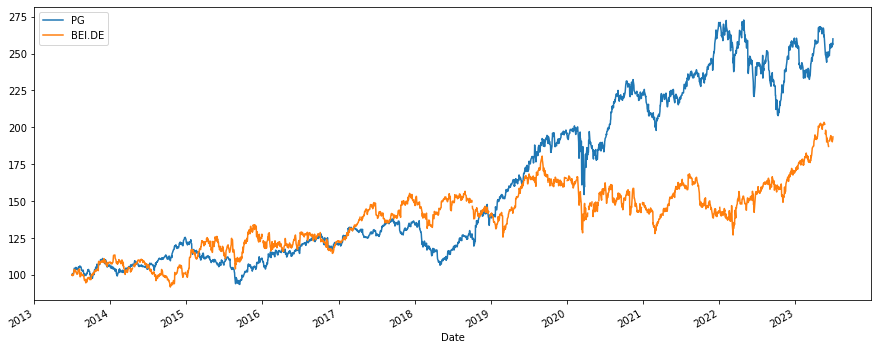

In [4]:
((tickers_data/tickers_data.iloc[0])*100).plot(figsize=(15,6))
plt.show()

In [6]:
sec_return = np.log(tickers_data/tickers_data.shift(1))
sec_return.head()

,PG,BEI.DE
Date,,
2013-07-01,NaN,NaN
2013-07-02,0.005369,0.004269
2013-07-03,0.001656,-0.009002
2013-07-05,-0.002932,0.000148
2013-07-08,0.005347,0.003993


In [7]:
for i in sec_return:
    print(i,"Annual Mean: ",sec_return[i].mean() * 250)
    print(i,"Annual SD: ",sec_return[i].std() * 250 ** 0.5)

PG Annual Mean:  0.0949060103923701
PG Annual SD:  0.18086251462083794
BEI.DE Annual Mean:  0.06736192743636962
BEI.DE Annual SD:  0.19825401401041903


## Calculating the Covariance

It measures the direction of the relationship between two variables. A positive covariance means that both variables tend to be high or low at the same time. A negative covariance means that when one variable is high, the other tends to be low.

In [8]:
cov_matrix = sec_return.cov()
cov_matrix

,PG,BEI.DE
PG,0.000131,0.000039
BEI.DE,0.000039,0.000157


In [9]:
cov_matrix_a = sec_return.cov() * 250
cov_matrix_a

,PG,BEI.DE
PG,0.032711,0.009814
BEI.DE,0.009814,0.039305


In [11]:
# Defining the weights of the portfolio:
weights = np.array([0.5,0.5]) # Considering both stocks have same weights

## Portfolio Variance:

In [12]:
portfolio_var = np.dot(weights.T,(np.dot(sec_return.cov() * 250,weights)))
portfolio_var

0.022911150050196283

## Portfolio Volatility:

In [13]:
portfolio_vol = np.dot(weights.T,(np.dot(sec_return.cov() * 250, weights))) ** 0.5
portfolio_vol

0.15136429582367264

In [14]:
print(str(round(portfolio_vol,5) * 100) + '%')

15.136%


## Diversiable and non-diversiable risk:

Diversiable risk can be eliminated if we invest in non-correlated assets. [Portfolio Variance - Weighted annual Variance]


In [18]:
pg_var_a = sec_return['PG'].var() * 250
pg_var_a

0.032711249194972813

In [19]:
bei_var_a = sec_return['BEI.DE'].var() * 250
bei_var_a

0.03930465407124342

In [20]:
DR = portfolio_var - (weights[0] ** 2 * pg_var_a) - (weights[1] ** 2 * bei_var_a)
DR

0.004907174233642224

In [21]:
print(str(round(DR,5) * 100) + '%')

0.49100000000000005%


### The Remaining part of the portfolio is the Non-Diversiable Risk.

In [22]:
NDR = (weights[0] ** 2 * pg_var_a) + (weights[1] ** 2 * bei_var_a)
NDR

0.01800397581655406

In [23]:
NDR1 = portfolio_var - DR
NDR1

0.01800397581655406